In [211]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [212]:
# Load the data
data= scipy.io.loadmat('ex7data2.mat')

In [213]:

x_example=data["X"]

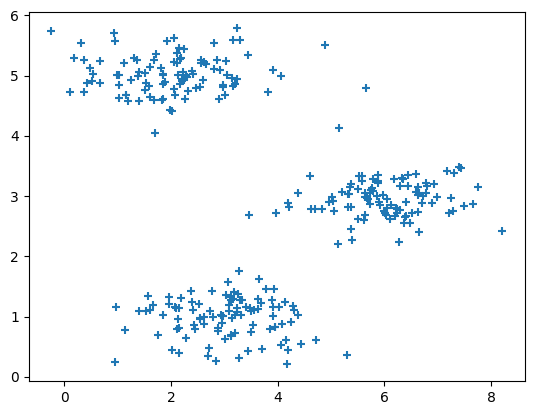

In [214]:
# Scatter plot the data points
plt.scatter(x_example[:, 0], x_example[:, 1], marker="+")

In [215]:
# Function to find the closest centroids for each data point
def findClosestCentroids(centroid, data):
    m = data.shape[0]
    idx = np.zeros((m, 1))
    for i in range(m):
        # Calculate the Euclidean distance between the data point and centroids
        distances = np.linalg.norm(data[i] - centroid, axis=1)
        # Find the index of the closest centroid (cluster)
        idx[i] = np.argmin(distances) + 1  # Adding 1 to make cluster IDs start from 1
    return idx

In [216]:
# Function to compute new centroids based on the assigned clusters
def computeCentroids(idx, data, k):
    n = data.shape[1]
    centroid = np.zeros((k, n))
    for i in range(1, k + 1):
        # Create a binary mask for data points belonging to cluster i
        cluster = (idx == i).astype(int).reshape(-1, 1)
        # Count the number of data points in the cluster
        points_in_cluster = np.count_nonzero(cluster)
        # Multiply the cluster mask with data to get points in the cluster
        cluster = cluster * data
        # Calculate the sum of points in the cluster along each dimension
        total = np.sum(cluster, axis=0)
        # Update the centroid for cluster i
        centroid[i - 1, :] = total / points_in_cluster
    return centroid

In [217]:

# Function to plot the clusters and centroid history
def plot_cluster_and_centroid_history(centroid_history, inclass, color):
    plt.scatter(x_example[:, 0][idx == inclass], x_example[:, 1][idx == inclass], c=color, marker="x")
    plt.plot(centroid_history[:, 0], centroid_history[:, 1], c="black")
    plt.scatter(centroid_history[:, 0], centroid_history[:, 1], c="black", marker="X")

In [218]:
# Main K-means modeling function
def model(max_iter, data, k, centroid):
    n = data.shape[1]
    centroid_history = np.zeros((k, n))
    for i in range(max_iter):
        # Find the closest centroids for each data point
        idx = findClosestCentroids(centroid, data)
        # Store the centroid history for plotting
        centroid_history = np.hstack((centroid_history, centroid))
        # Compute new centroids based on the assigned clusters
        centroid = computeCentroids(idx, data, k)
    centroid_history = centroid_history[:, n:]
    return centroid, centroid_history

In [219]:

# Function to visualize clusters and centroid history
def visualize(k, history):
    for i in range(k):
        colors = ['green', "blue", "yellow", "violet"]
        plot_cluster_and_centroid_history(history[i, :].reshape((10, 2)), i + 1, colors[i])

In [220]:
# Initial centroids and parameters
initial_centroids = np.array([[3, 3],
                               [6, 2],
                               [8, 5]])
k = 3
data = x_example
max_iter = 10
m, n = data.shape

In [221]:
# Perform K-means clustering and store centroid history
centroid, history = model(max_iter, data, k, initial_centroids)

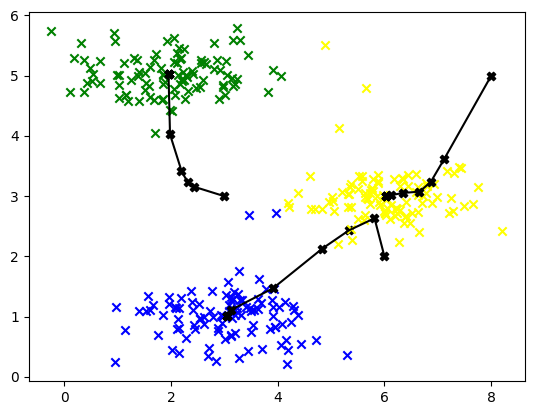

In [222]:
# Visualize the clusters and centroid history
visualize(k, history)